# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

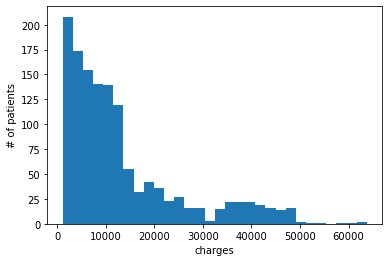

In [4]:
plt.hist(medical['charges'], bins = 30)
plt.xlabel('charges')
plt.ylabel('# of patients')
plt.show();

In [5]:
c_mean = np.mean(medical['charges'].values)
c_std = np.std(medical['charges'].values, ddof=1)

print('Mean charge:', c_mean)
print('Standard deviation:', c_std)

Mean charge: 13270.422265141257
Standard deviation: 12110.011236694001


The amount charged to patients and number of patients seem to follow exponential relationship. A vast majority of patients are charged less then 10,000. A very few patients are charged with amount more than 50,000. 

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Since the data represent a random sample of charges, the underlying population's mean value of charges is unknown. It is therefore necessary to determine the population mean charge and compare it with the value of interest (12,000). We can get a sampling distribution by taking multiple sample from the available data. This distribution, according to the Central Limit Theorem, should allow us to determine the population mean. This mean value can then be used to determine whether the hospital's revenue stream has fallen below a key threshold (12,000).

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A 95% confidence interval is typically used to determine the likelihood of crossing the threshold (12,000). Since the threshold is a single point, a one-sided confidence interval should be constructed for this study.

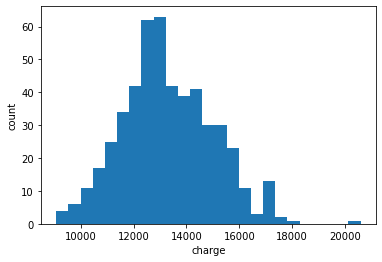

In [6]:
seed(42)
sample_means = []
for i in range (500):
    sample_means.append(np.mean(np.random.choice(medical['charges'], 50)))

plt.hist(sample_means, bins = 25)
plt.xlabel('charge')
plt.ylabel('count')
plt.show();

In [7]:
pop_mean = np.mean(sample_means)
pop_std = np.std(sample_means)*np.sqrt(50)
s_std = np.std(sample_means)

print('Population mean:', pop_mean)
print('Population std. dev.:', pop_std)

Population mean: 13309.18981209664
Population std. dev.: 12268.536570167293


In [8]:
# 95% Confidence interval

conf_interval = t.interval(0.95, len(sample_means)-1, loc = pop_mean, scale = pop_std)
conf_interval

(-10795.16457171804, 37413.54419591132)

Since 95% confidence interval includes '0', population mean, and key threshold value, the difference between mean charges and key threshold is not statistically significant. We do not have enough evidence to reject the Null hypothesis.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ Null hypothesis: there is no statistically significant difference between the amount charged to people with and without insurance.

Alternative hypothesis: there is a statistically significant difference between the amount charged to people with and without insurance.

We assume that the two groups have different variances.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [9]:
# Number of patients without and with insurance claim

wo_count = medical['insuranceclaim'].value_counts().values[0]
w_count = medical['insuranceclaim'].value_counts().values[1]
wo_count, w_count

(783, 555)

In [10]:
medical.groupby(['insuranceclaim']).mean()['charges']

insuranceclaim
0     8821.421892
1    16423.928277
Name: charges, dtype: float64

In [11]:
# Create separate groups based on insurance claim

wo_claim = medical[medical['insuranceclaim']==0]['charges']
w_claim = medical[medical['insuranceclaim']==1]['charges']

t-test assumes a normal or close to normal distribution of dependent variable (charges) and only 2 classes of categorical variable (insurance claim).

In [12]:
# Average charges paid by patients without and with insurance claim

wo_mean = np.mean(wo_claim)
w_mean = np.mean(w_claim)
wo_mean, w_mean

(8821.421892306294, 16423.928276537663)

In [13]:
wo_std = np.std(wo_claim)
w_std = np.std(w_claim)
wo_std, w_std

(6440.699841605233, 14036.956250260411)

In [14]:
# Pooled standard deviation of the two groups

sp = np.sqrt(((wo_count-1)*wo_std**2 + (w_count-1)*w_std**2)/(wo_count + w_count - 2))
sp

10294.954962020644

In [15]:
# t-statistic

t_stat = (wo_mean - w_mean)/(sp*np.sqrt(1/wo_count + 1/w_count))
t_stat

-13.308578124910937

In [16]:
from scipy.stats import ttest_ind

In [17]:
ttest_ind(wo_claim, w_claim, equal_var = False)

Ttest_indResult(statistic=-13.298031957975649, pvalue=1.1105103216309125e-37)

Since 'p' value is very small, we can reject the Null Hypothesis. This means that there is a significant difference between the price charged to patients with and without insurance claim.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ A 'z' score can be interpreted as how far the estimate is away from zero, measured in terms of standard deviation. We have to know population mean and standard deviation for carrying out a z-test. Thus, we can employ scipy.stats.ttest_1samp, which uses population mean to perform the t-test on one group of scores.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test